In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

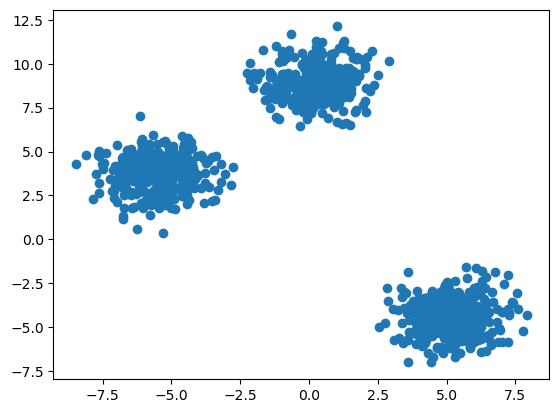

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.cluster import KMeans


In [ ]:
# Manual Process
## Elbow mwthod to find optimal number of clusters

wcss=[] #within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 854.2929980760774,
 754.3818382775474,
 663.7009456137093,
 579.4942337478147,
 531.3846583938488]

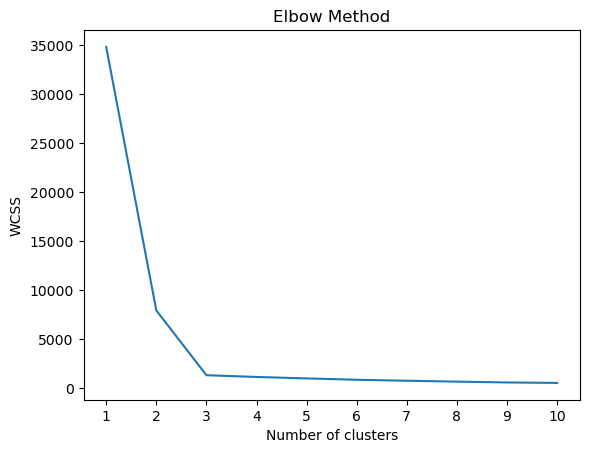

In [9]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [11]:
y_labels = kmeans.fit_predict(X_train)

In [12]:
y_test_labels = kmeans.predict(X_test)

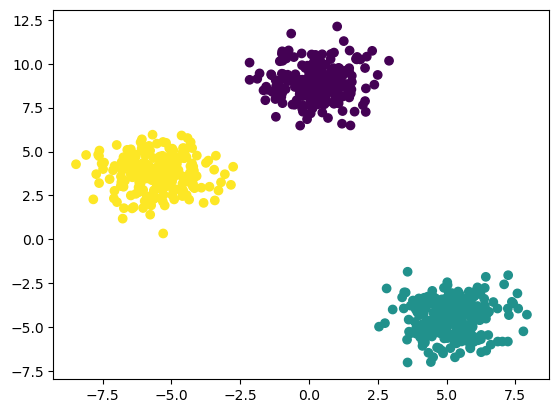

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

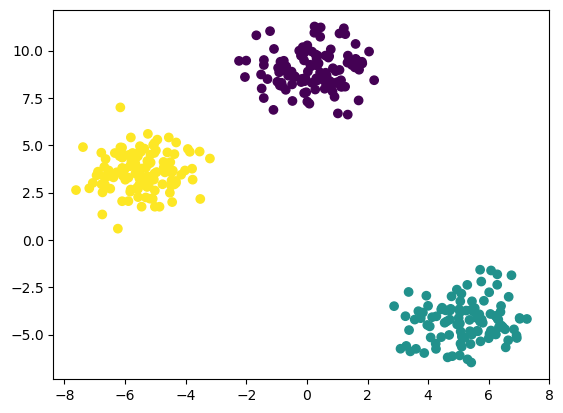

In [14]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [16]:
from kneed import KneeLocator

In [17]:
KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing').knee   #range(1,11) for clusters, curve convex as wcss decreases with more clusters, direction decreasing as wcss decreases

3

In [18]:
# Performance Metrics for clustering
from sklearn.metrics import silhouette_score  

In [21]:
import sklearn.metrics as metrics

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = metrics.silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6354604426903632,
 0.48740780437837466,
 0.50394447132655,
 0.3383936534393026,
 0.3346023327070525,
 0.3370470031762018,
 0.3350592272584029]

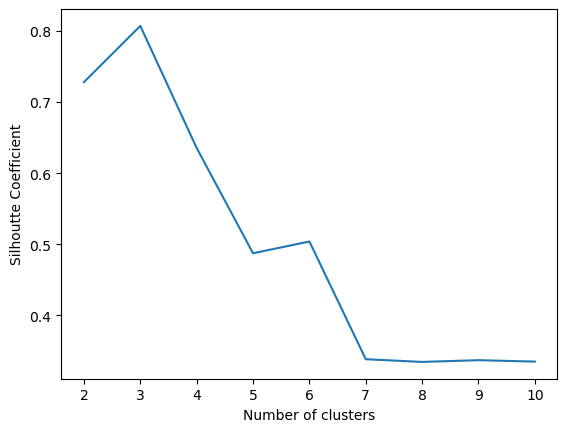

In [ ]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.show() #Higher the silhouette coefficient, better the clusters; here 3 clusters seems to be the best; which also lies between +1 and -1